In [79]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

In [80]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [81]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [82]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [83]:
data_dir

'.\\datasets\\flower_photos'

In [84]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [85]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [86]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [87]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [88]:
roses[1]

WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg')

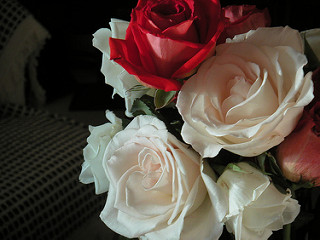

In [89]:
PIL.Image.open(str(roses[1]))

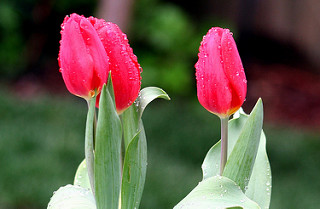

In [90]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<b>Read flowers images from disk into numpy array using opencv</b>

In [91]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [92]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [93]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [94]:
str(flowers_images_dict['roses'][0])


'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [95]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [96]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [97]:
img.shape

(240, 179, 3)

In [98]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [99]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))
   

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [100]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [101]:
X = np.array(X)
y = np.array(y)

In [102]:
y[:5]

array([0, 0, 0, 0, 0])

In [103]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

<h1>Train test split</h1>

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [105]:
len(X_train)

2752

In [106]:
len(X_test)

918

<h1>Preprocessing: scale images</h1>

In [107]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h1>Build convolutional neural network and train it</h1>

In [108]:

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 106s 686ms/step - loss: 1.3402 - accuracy: 0.4320
Epoch 2/30
86/86 [==============================] - 55s 643ms/step - loss: 1.0305 - accuracy: 0.5850
Epoch 3/30
86/86 [==============================] - 55s 640ms/step - loss: 0.8675 - accuracy: 0.6672
Epoch 4/30
86/86 [==============================] - 54s 632ms/step - loss: 0.7024 - accuracy: 0.7369
Epoch 5/30
86/86 [==============================] - 54s 624ms/step - loss: 0.5001 - accuracy: 0.8187
Epoch 6/30
86/86 [==============================] - 54s 624ms/step - loss: 0.2983 - accuracy: 0.9041
Epoch 7/30
86/86 [==============================] - 55s 633ms/step - loss: 0.1625 - accuracy: 0.9524
Epoch 8/30
86/86 [==============================] - 56s 651ms/step - loss: 0.0899 - accuracy: 0.9757
Epoch 9/30
86/86 [==============================] - 55s 640ms/step - loss: 0.0701 - accuracy: 0.9811
Epoch 10/30
86/86 [==============================] - 54s 629ms/step - loss: 0.0457 - accur

In [109]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 21s 305ms/step - loss: 2.6428 - accuracy: 0.6580


[2.6428167819976807, 0.657952070236206]

<b>Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make
    some predictions before we use data augmentation to address overfitting</b>

In [110]:

predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 10s 287ms/step


array([[  8.922236 ,  12.482224 ,  -4.2115016, -19.689117 ,  -9.185539 ],
       [ 14.222623 ,  -5.7854066, -10.820418 , -13.824552 ,   3.600627 ],
       [ -1.6765829,   5.4214582,  11.369717 , -19.448902 ,  -4.207514 ],
       ...,
       [ -1.1296414,  -5.660098 , -22.727886 ,   7.0748   ,   7.554271 ],
       [  2.3121688,  -1.8063959,  -8.575328 ,   2.3925726,   1.5199625],
       [ -3.7461772, -13.359349 ,  -7.48459  ,   4.7391653,  -1.7279271]],
      dtype=float32)

In [111]:
score = tf.nn.softmax(predictions[0])

In [112]:
np.argmax(score)

1

In [113]:
y_test[0]

1

<b>Improve Test Accuracy Using Data Augmentation</b>

In [151]:
data_augmentation = keras.Sequential(
  [
      layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
      layers.experimental.preprocessing.RandomZoom(0.5),
      #layers.experimental.preprocessing.RandomContrast(0.9),
      layers.experimental.preprocessing.RandomRotation(0.9)  
      
      

  ]
)

NameError: name 'img_height' is not defined

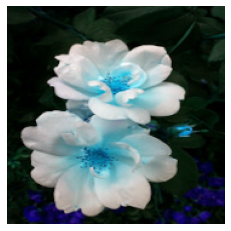

In [137]:
plt.axis('off')
plt.imshow(X[0])

In [122]:
data_augmentation(X)[0]


<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[19.493036  , 34.123     , 20.863073  ],
        [19.592762  , 34.57621   , 20.9628    ],
        [16.935982  , 31.50423   , 18.674694  ],
        ...,
        [ 4.3773756 , 17.46474   , 10.180519  ],
        [ 4.810482  , 15.6594095 ,  9.908964  ],
        [ 4.041792  , 13.645983  ,  8.42576   ]],

       [[15.130428  , 29.130428  , 17.130428  ],
        [15.590463  , 30.773867  , 17.818598  ],
        [14.459499  , 30.046196  , 16.937134  ],
        ...,
        [14.776774  , 37.99258   , 23.496822  ],
        [15.887176  , 37.414013  , 24.57158   ],
        [13.1936455 , 33.05569   , 20.888996  ]],

       [[14.909175  , 28.5405    , 16.5405    ],
        [14.890937  , 30.323841  , 17.368572  ],
        [13.657503  , 30.414768  , 17.        ],
        ...,
        [21.611137  , 47.68342   , 32.36841   ],
        [20.136654  , 46.423805  , 30.919994  ],
        [16.633644  , 42.91149   , 25.958958  ]],

       ...,

     

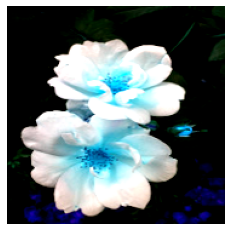

In [138]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))



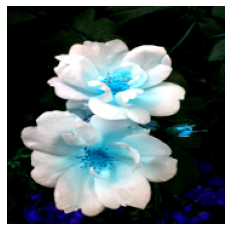

In [139]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


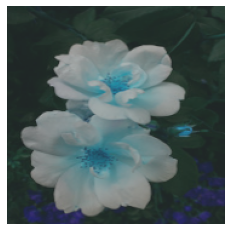

In [140]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


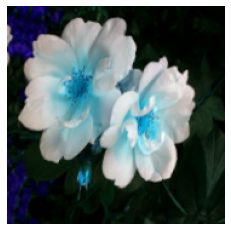

In [143]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


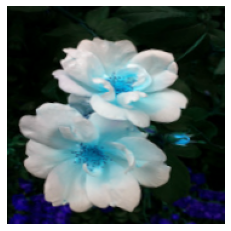

In [144]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

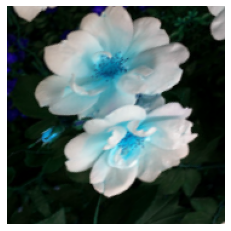

In [145]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [150]:

num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/4
86/86 [==============================] - 151s 783ms/step - loss: 1.4669 - accuracy: 0.3728
Epoch 2/4
86/86 [==============================] - 60s 694ms/step - loss: 1.1156 - accuracy: 0.5396
Epoch 3/4
86/86 [==============================] - 62s 726ms/step - loss: 1.0209 - accuracy: 0.6003
Epoch 4/4
86/86 [==============================] - 63s 729ms/step - loss: 0.9660 - accuracy: 0.6086


In [149]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 16s 147ms/step - loss: 0.8065 - accuracy: 0.7113


[0.8064932227134705, 0.7113289833068848]